In [1]:
## Using Python3.5 ## Bike Sharing Try
## Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math as m

In [2]:
## Load data to Python
# make python folder your current working directory
if os.path.isdir('python'):
	os.chdir('python')
bike = pd.read_csv('Bike.csv')

In [3]:
## Clean data
## change spaces in columns to underscore then lowercase all items

def change_col(data):
 new_col = [i.lower().replace(' ','_').replace('#','no') for i in data.columns]
 data.columns = new_col
 return data

In [4]:
## Exploratory Data Analysis
bike.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,432320,2740,8/31/2014 4:42,San Jose Diridon Caltrain Station,2,8/31/2014 5:28,San Jose Diridon Caltrain Station,2,696,Customer,85756
1,421410,1693,8/23/2014 12:30,San Jose Diridon Caltrain Station,2,8/23/2014 12:58,San Jose Diridon Caltrain Station,2,93,Subscriber,95112
2,391710,195,8/2/2014 20:10,San Jose Diridon Caltrain Station,2,8/2/2014 20:13,San Jose Diridon Caltrain Station,2,205,Subscriber,20010
3,381906,1272,7/27/2014 13:32,San Jose Diridon Caltrain Station,2,7/27/2014 13:54,San Jose Diridon Caltrain Station,2,119,Subscriber,95112
4,343925,101,6/29/2014 14:59,San Jose Diridon Caltrain Station,2,6/29/2014 15:01,San Jose Diridon Caltrain Station,2,44,Subscriber,95112


In [5]:
bike.tail()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
171787,277755,145,5/9/2014 8:31,Ryland Park,84,5/9/2014 8:33,Ryland Park,84,656,Subscriber,95112
171788,271938,10297,5/5/2014 9:58,Ryland Park,84,5/5/2014 12:50,Ryland Park,84,72,Customer,95116
171789,262290,125,4/27/2014 13:11,Ryland Park,84,4/27/2014 13:13,Ryland Park,84,49,Subscriber,95112
171790,247257,804,4/14/2014 9:36,Ryland Park,84,4/14/2014 9:49,Ryland Park,84,143,Subscriber,95112
171791,247256,804,4/14/2014 9:36,Ryland Park,84,4/14/2014 9:49,Ryland Park,84,57,Subscriber,95112


In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171792 entries, 0 to 171791
Data columns (total 11 columns):
Trip ID            171792 non-null int64
Duration           171792 non-null int64
Start Date         171792 non-null object
Start Station      171792 non-null object
Start Terminal     171792 non-null int64
End Date           171792 non-null object
End Station        171792 non-null object
End Terminal       171792 non-null int64
Bike #             171792 non-null int64
Subscriber Type    171792 non-null object
Zip Code           171581 non-null object
dtypes: int64(5), object(6)
memory usage: 14.4+ MB


In [7]:
bike.describe()

,Trip ID,Duration,Start Terminal,End Terminal,Bike #
count,171792.000000,171792.000000,171792.000000,171792.000000,171792.000000
mean,315198.766503,1132.514250,57.403622,57.382090,429.216692
std,67369.726104,6084.234943,17.599744,17.668405,151.841710
min,198776.000000,60.000000,2.000000,2.000000,9.000000
25%,256967.750000,345.000000,50.000000,50.000000,335.000000
50%,314366.500000,517.000000,61.000000,61.000000,442.000000
75%,373070.250000,761.000000,70.000000,70.000000,546.000000
max,432946.000000,716480.000000,84.000000,84.000000,878.000000


In [8]:
def change_col(data):
    new_col = [i.lower().replace(' ','_').replace('#','no') for i in data.columns]
    data.columns = new_col
    return data
bike = change_col(bike)

Creating new columns for the data, Separating Time and Date

In [9]:
bike.start_date = pd.to_datetime(bike.start_date)
bike.end_date = pd.to_datetime(bike.end_date)

In [19]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171792 entries, 0 to 171791
Data columns (total 11 columns):
trip_id            171792 non-null int64
duration           171792 non-null int64
start_date         171792 non-null datetime64[ns]
start_station      171792 non-null object
start_terminal     171792 non-null int64
end_date           171792 non-null datetime64[ns]
end_station        171792 non-null object
end_terminal       171792 non-null int64
bike_no            171792 non-null int64
subscriber_type    171792 non-null object
zip_code           171581 non-null object
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 14.4+ MB


In [21]:
bike.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_no,subscriber_type,zip_code
0,432320,2740,2014-08-31 04:42:00,San Jose Diridon Caltrain Station,2,2014-08-31 05:28:00,San Jose Diridon Caltrain Station,2,696,Customer,85756
1,421410,1693,2014-08-23 12:30:00,San Jose Diridon Caltrain Station,2,2014-08-23 12:58:00,San Jose Diridon Caltrain Station,2,93,Subscriber,95112
2,391710,195,2014-08-02 20:10:00,San Jose Diridon Caltrain Station,2,2014-08-02 20:13:00,San Jose Diridon Caltrain Station,2,205,Subscriber,20010
3,381906,1272,2014-07-27 13:32:00,San Jose Diridon Caltrain Station,2,2014-07-27 13:54:00,San Jose Diridon Caltrain Station,2,119,Subscriber,95112
4,343925,101,2014-06-29 14:59:00,San Jose Diridon Caltrain Station,2,2014-06-29 15:01:00,San Jose Diridon Caltrain Station,2,44,Subscriber,95112


In [ ]:
sns.swarmplot(x = 'zip_code', y = 'duration', data = bike, hue = 'subscriber_type')
plt.show()

## EDA

In [11]:
# Load functions
def ecdf(col):
	"""Compute ECDF for a one-dimensional array of measurements."""
	n = len(col) # Number of data points: n
	x = np.sort(col) # x-data for the ECDF: x
	y = np.arange(1, n+1) / float(n) # y-data for the ECDF: y
	return x,y

In [12]:
mean = np.mean(bike.duration)
std = np.std(bike.duration)
samples_exp = np.random.exponential(mean, size = 1000000)
samples_norm = np.random.normal(mean,std, size = 1000000)

In [13]:
x, y = ecdf(bike[(bike.duration < 15000)].duration)
x_theor, y_theor = ecdf(samples_exp)
x_theor2, y_theor2 = ecdf(samples_norm)


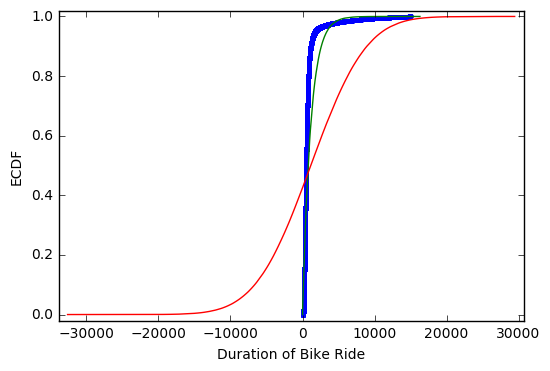

In [14]:
_ = plt.plot(x,y,marker = '.', linestyle = 'none')
_ = plt.plot(x_theor,y_theor)
_ = plt.plot(x_theor2,y_theor2, color = 'red')
_ = plt.xlabel('Duration of Bike Ride')
_ = plt.ylabel('ECDF')
_ = plt.margins(0.02)
plt.show()

In [15]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))


def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

14.6792289481
14.868138123


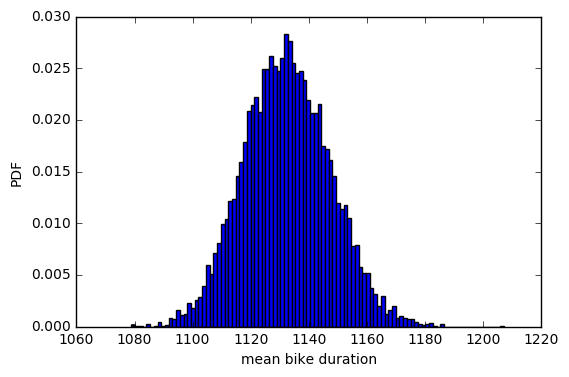

In [16]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(bike.duration,np.mean, 10000)

# Compute and print SEM
sem = np.std(bike.duration) / np.sqrt(len(bike.duration))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=100, normed=True)
_ = plt.xlabel('mean bike duration')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

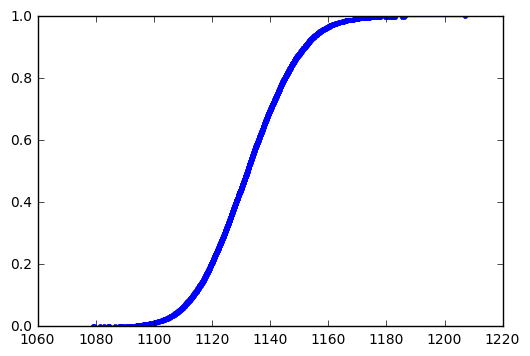

In [17]:
x, y = ecdf(bs_replicates)

plt.plot(x,y, marker = '.', linestyle = None)
plt.show()

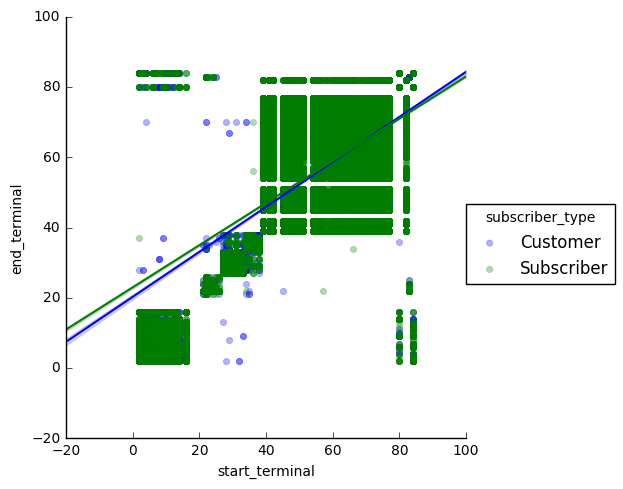

In [18]:
sns.lmplot(x = 'start_terminal', y = 'end_terminal', data = bike, hue = 'subscriber_type', scatter_kws={'alpha':0.3})
plt.show()
